In [2]:
import do_functions as do
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

In [26]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

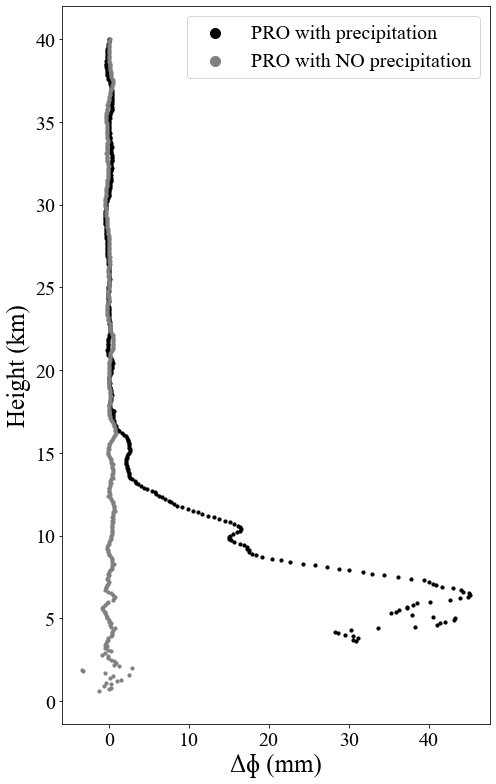

In [53]:
p = do.get_profile(df,330)
nop = do.get_profile(df,4)

h = np.linspace(0.1,40,400)


plt.figure(figsize=(7,11), tight_layout=True)

plt.scatter(p,h,label='PRO with precipitation',s=10,c='black')
plt.scatter(nop,h,label='PRO with NO precipitation',s=10,c='gray')

lgnd = plt.legend(scatterpoints=1,
                  prop= FontProperties(family='Times New Roman',style='normal', size=20))

lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]

plt.xlabel('Δɸ (mm)', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Height (km)',
           fontproperties=font,
           fontsize=25)

plt.xticks(fontproperties=font, 
           fontsize=20)
plt.yticks(fontproperties=font, 
           fontsize=20)
